## Loan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/loan.csv

--2022-04-09 06:58:19--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/loan.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.106
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/csv]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K  --.-KB/s    in 0.1s    

2022-04-09 06:58:20 (292 KB/s) - ‘loan.csv’ saved [38013/38013]



In [3]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('loan.csv') 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# getting the statistical measures of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


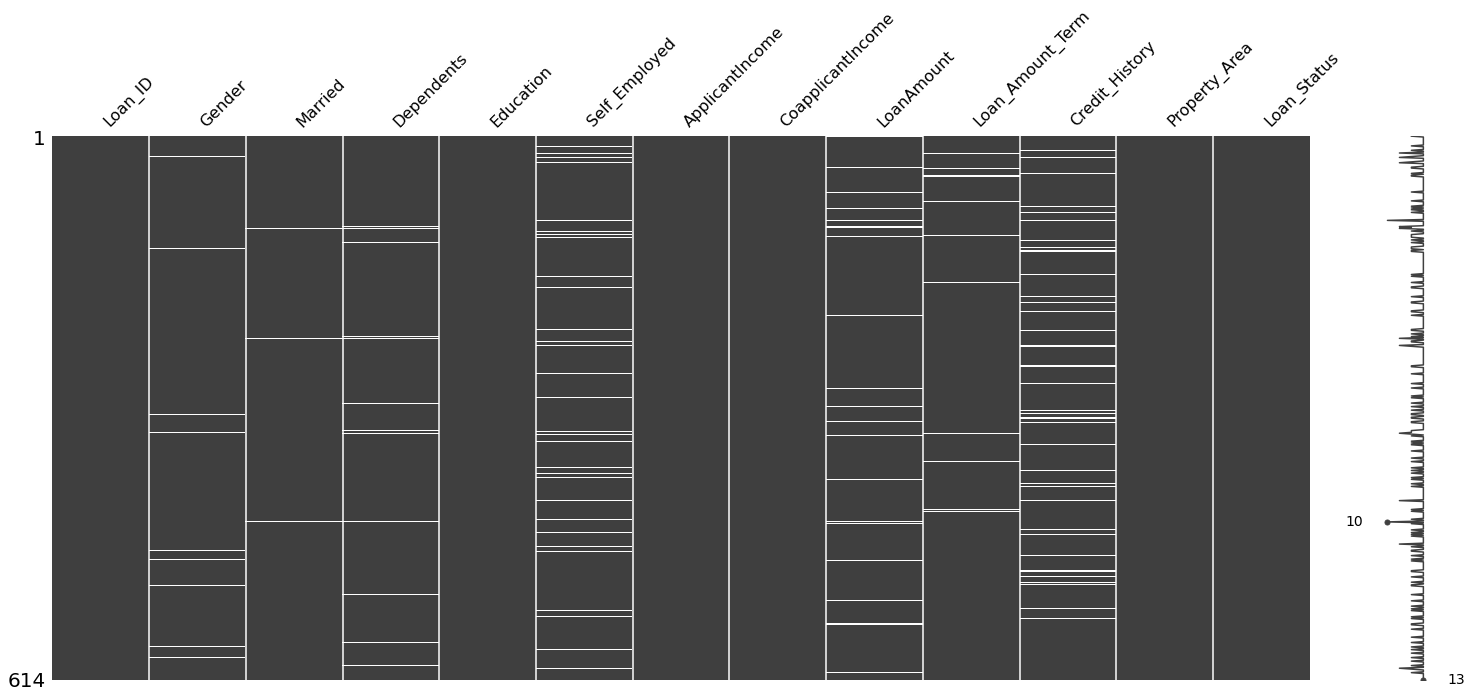

In [6]:
import missingno as msno
msno.matrix(df)

In [7]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum().sum()

149

In [9]:
# dropping the missing values
#df = df.dropna()

In [10]:
#fill al nan with mode
df = df.fillna(df.mode().iloc[0]) 

In [11]:
# number of missing values in each column
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [13]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

0 --> No

1 --> Y

In [14]:
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,5446.078125,1877.807292,149.432292,344.56250,0.572917
1,5384.068720,1504.516398,143.661137,341.43128,0.983412


## EDA

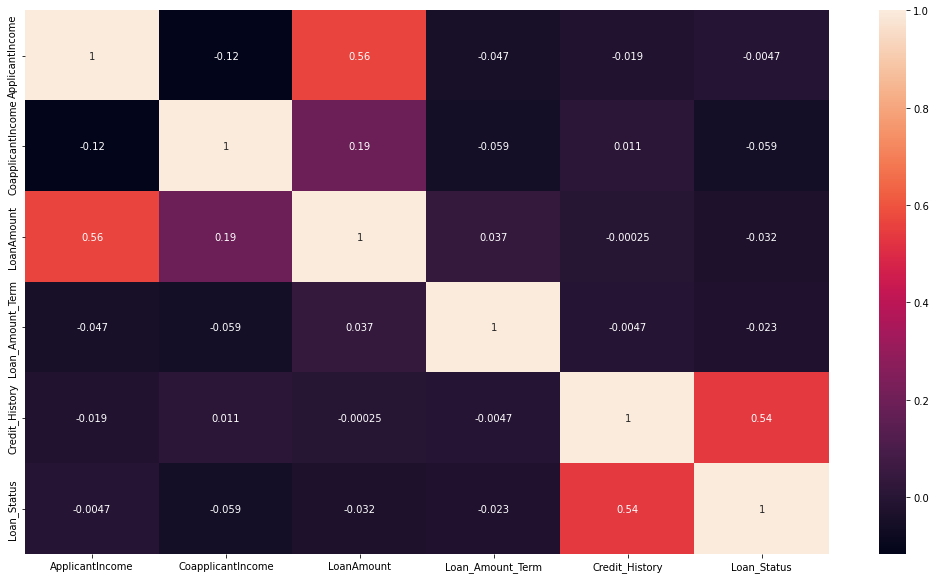

In [15]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

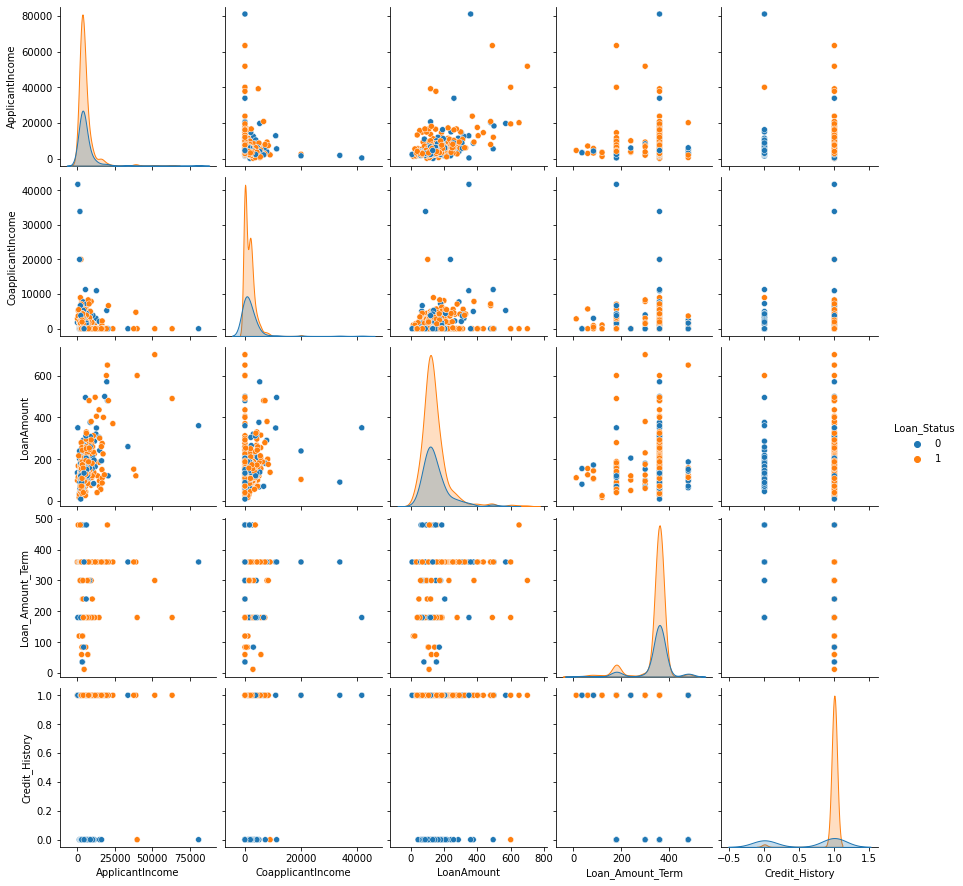

In [16]:
sns.pairplot(df,hue='Loan_Status');

In [17]:
# Dependent column values
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [19]:
# dependent values
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

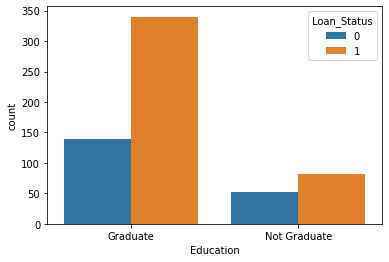

In [20]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

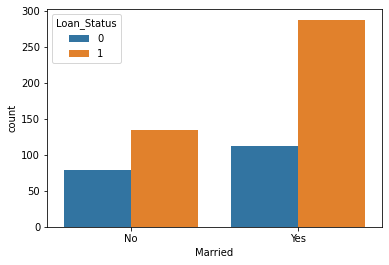

In [21]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [22]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [23]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},
            'Gender':{'Male':1,'Female':0},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
            'Education':{'Graduate':1,'Not Graduate':0}
            },inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [24]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [25]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X)
X_ = standardized_data

Train Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (491, 11) (123, 11)


>1, train: 0.804, test: 0.797
>2, train: 0.813, test: 0.797
>3, train: 0.813, test: 0.797
>4, train: 0.821, test: 0.805
>5, train: 0.831, test: 0.797
>6, train: 0.847, test: 0.797
>7, train: 0.868, test: 0.789
>8, train: 0.892, test: 0.789
>9, train: 0.908, test: 0.764
>10, train: 0.945, test: 0.748
>11, train: 0.967, test: 0.740
>12, train: 0.982, test: 0.740
>13, train: 0.994, test: 0.740
>14, train: 1.000, test: 0.724
>15, train: 1.000, test: 0.732
>16, train: 1.000, test: 0.724
>17, train: 1.000, test: 0.732
>18, train: 1.000, test: 0.724
>19, train: 1.000, test: 0.732
>20, train: 1.000, test: 0.732


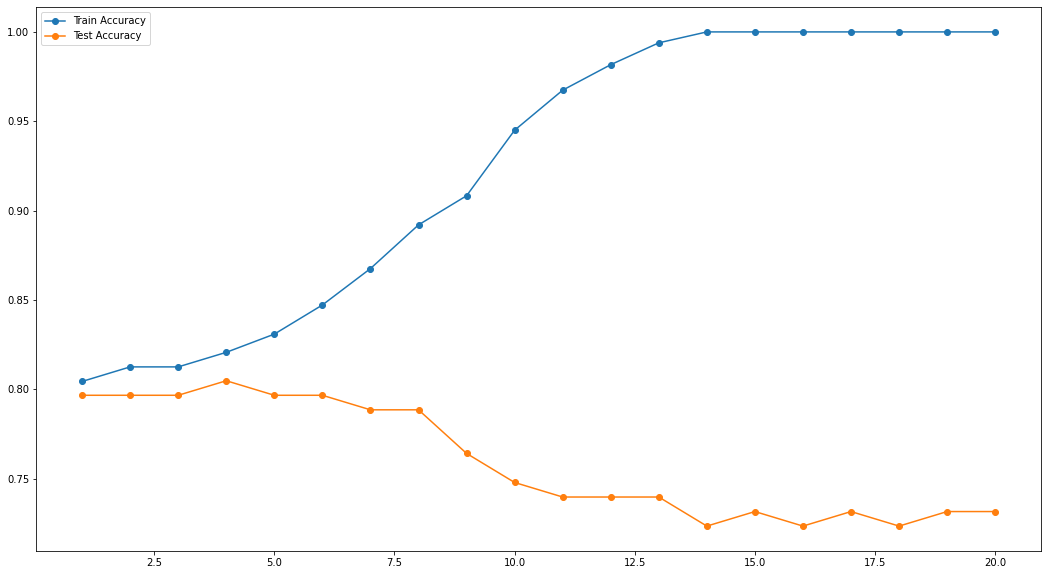

In [28]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [29]:
## one of the best fit is with depth=4 --> train: 0.958, test: 0.740

Training the Model

In [30]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=4)

In [31]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=667)

Text(0.5, 0, 'Relative Importance')

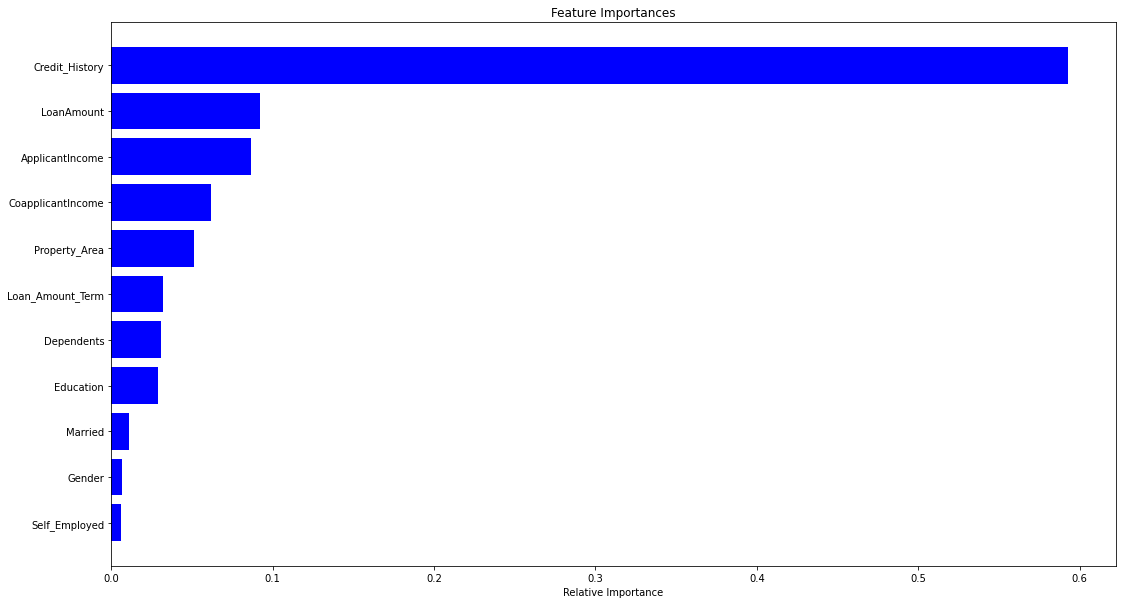

In [32]:
#Feature importance for Random Forest
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Model Evaluation

In [33]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8048780487804879


In [34]:
labels = ['No Loan', 'Yes Loan']

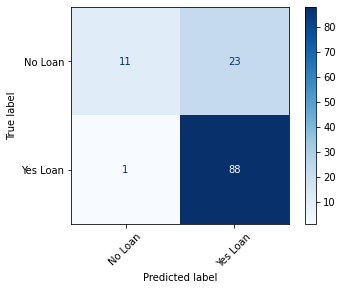

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [36]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     No Loan       0.92      0.32      0.48        34
    Yes Loan       0.79      0.99      0.88        89

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.83      0.80      0.77       123



## ROC Curves

In [37]:
!pip install plot-metric --quiet

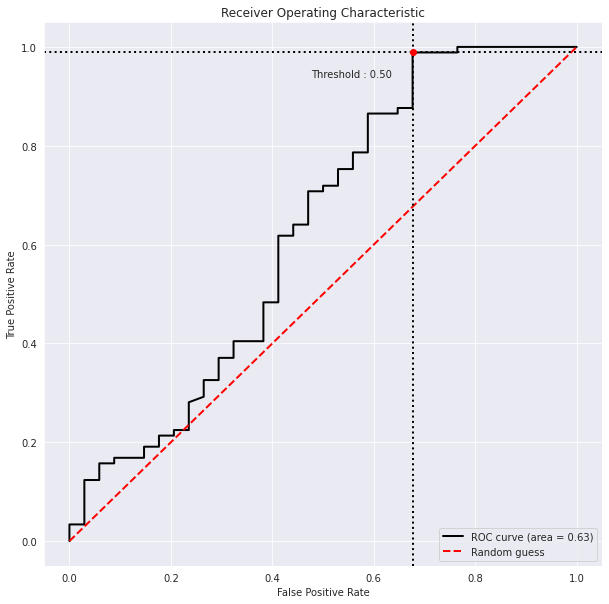

In [38]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.6280568407138136

## P-R Curves

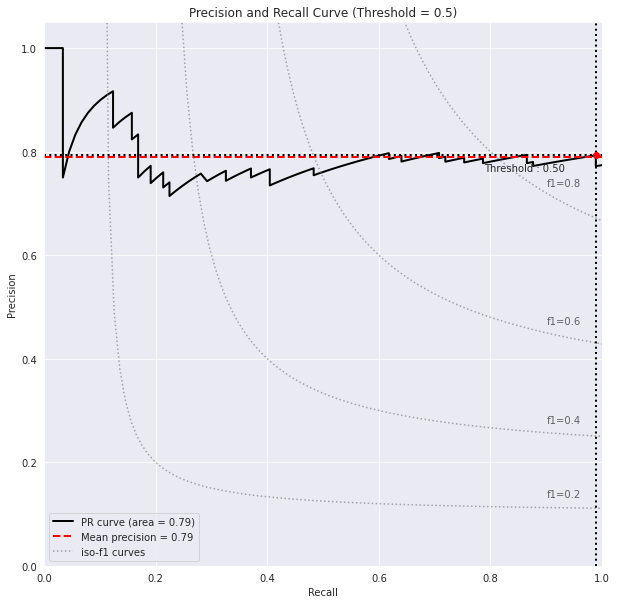

In [40]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

### Making a Predictive System + Normalization

In [41]:
input_data = [1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('No access to Loan')
else:
  print('Yes access to Loan')

[[ 0.47234264  0.72881553  0.14245922  0.52836225 -0.39260074 -0.13441195
  -0.03873155 -0.20764834  0.2732313   0.41173269 -1.31851281]]
1
Yes access to Loan


## Feature selection
Check the Pipeline performance with feature 

In [42]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

featu=[]
for i in range(2,len(X.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=4)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))


feature selected 2, Acc.Test: 0.650, AUC: 0.367
feature selected 3, Acc.Test: 0.764, AUC: 0.524
feature selected 4, Acc.Test: 0.797, AUC: 0.601
feature selected 5, Acc.Test: 0.797, AUC: 0.575
feature selected 6, Acc.Test: 0.797, AUC: 0.585
feature selected 7, Acc.Test: 0.805, AUC: 0.557
feature selected 8, Acc.Test: 0.797, AUC: 0.605
feature selected 9, Acc.Test: 0.797, AUC: 0.613
feature selected 10, Acc.Test: 0.805, AUC: 0.588

 Best number of feature selection is: 9


## Pipeline

### Always give not normalize data to train the Pipeline!

In [43]:
# X = features not standardized
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state=667
                                                    )

In [44]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=4)

pipe = Pipeline([
                ('scaler', standardize),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=9)),
                ('classifier',
                 RandomForestClassifier(max_depth=4, random_state=667))])

In [45]:
input_data = [1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]

prediction = pipe.predict([input_data])
print(prediction[0])

if (prediction[0] == 0):
  print('No access to Loan')
else:
  print('Yes access to Loan')

1
Yes access to Loan


In [46]:
import joblib
joblib.dump(pipe,'pipe_loan.pkl')

['pipe_loan.pkl']

In [47]:
uploaded_model = joblib.load('pipe_loan.pkl')

uploaded_model.predict([input_data])[0] #0 means No Loan

1